## Setup inicial - Bibliotecas e importação de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/machine1.csv")

In [17]:
df.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


## 1. Categorias únicas de cada variável qualitativa

Toda variável qualitativa possui um conjunto  
finito de valores que ela pode assumir, que  
nós chamamos de "categorias únicas".

O dataset em questão traz um total de  
**três variáveis qualitativas**:  
"*cash_type*", "*card*" e "*coffee_name*".

Para exibir as categorias únicas de cada variável  
qualitativa, basta usar a função `unique()`.

In [5]:
df["cash_type"].unique()

array(['card', 'cash'], dtype=object)

In [6]:
df["card"].unique()

array(['ANON-0000-0000-0001', 'ANON-0000-0000-0002',
       'ANON-0000-0000-0003', ..., 'ANON-0000-0000-1314',
       'ANON-0000-0000-1315', 'ANON-0000-0000-1316'],
      shape=(1317,), dtype=object)

In [7]:
df["coffee_name"].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

## 2. Distribuição da frequência das categorias de "*coffee_name*"

In [8]:
df["coffee_name"].value_counts()

coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64

In [9]:
# Em percentual:
df["coffee_name"].value_counts(normalize=True) * 100

coffee_name
Americano with Milk    22.662266
Latte                  21.507151
Americano              15.896590
Cappuccino             13.778878
Cortado                 8.030803
Hot Chocolate           7.755776
Cocoa                   6.683168
Espresso                3.685369
Name: proportion, dtype: float64

#### Logo, pode-se afirmar que os cafés mais vendidos são:

1 - **Americano with Milk** (22,7%)  
2 - **Latte** (21,5%)  
3 - **Americano** (15,9%)

## 3. Moda das variáveis qualitativas

In [14]:
df["coffee_name"].mode()

0    Americano with Milk
Name: coffee_name, dtype: object

In [13]:
df["cash_type"].mode()

0    card
Name: cash_type, dtype: object

In [15]:
df["card"].mode()

0    ANON-0000-0000-0012
Name: card, dtype: object

## 4. Visualização da distribuição de categorias

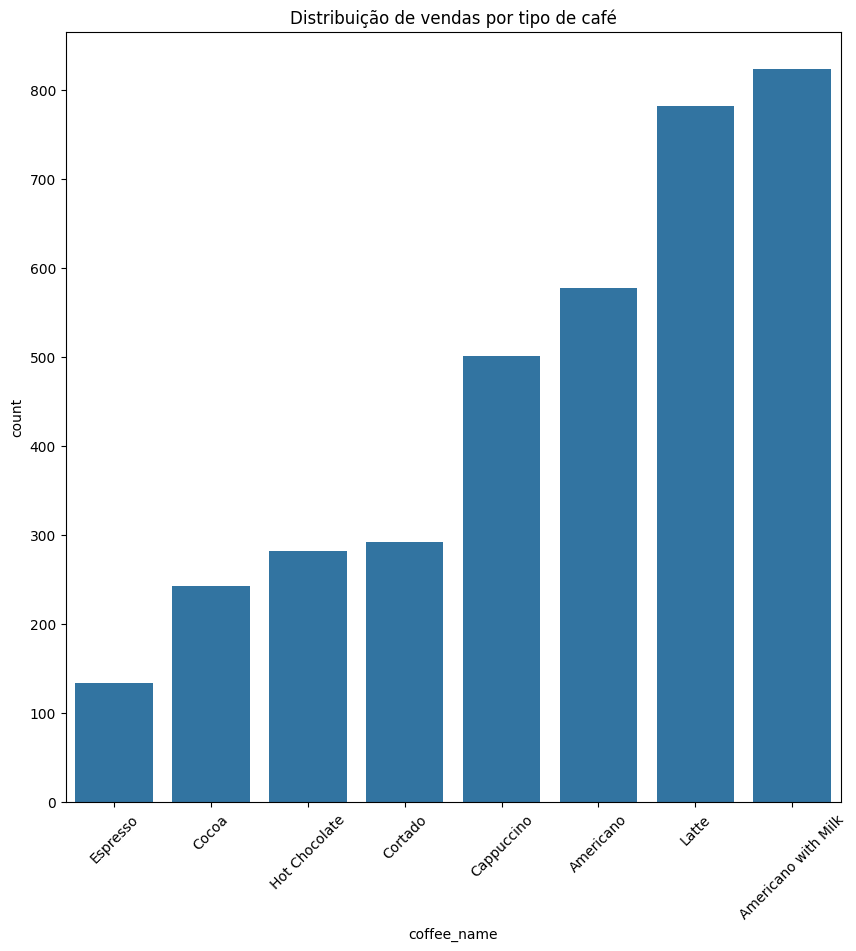

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(
    data=df, 
    x="coffee_name", 
    order=df["coffee_name"].value_counts().index[::-1] # Ordem invertida
)
plt.xticks(rotation=45)

plt.title("Distribuição de vendas por tipo de café")
plt.show()

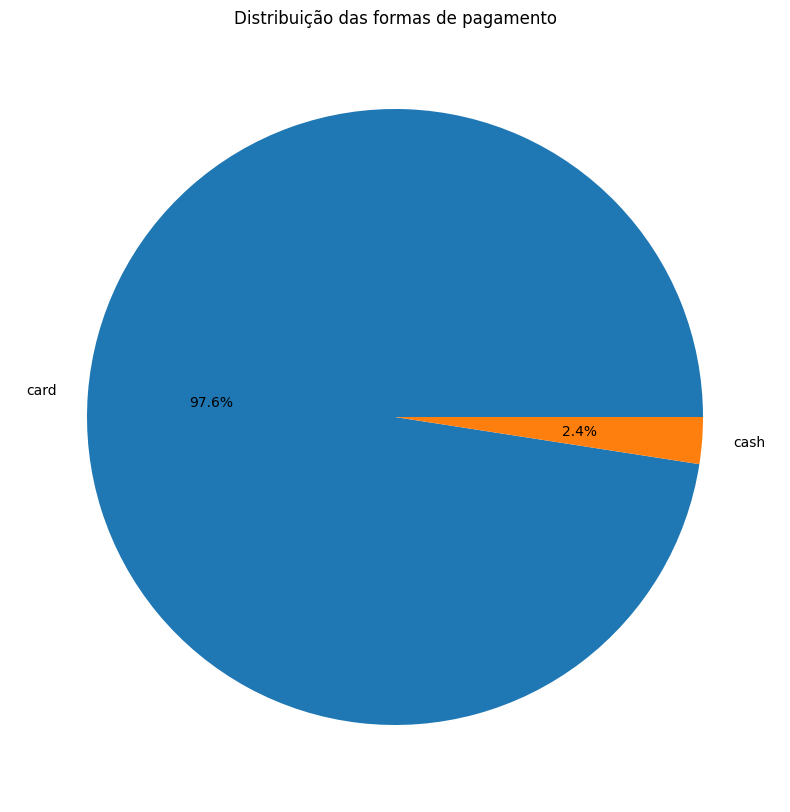

In [34]:
df["cash_type"].value_counts().plot(
    kind="pie",
    figsize=(10,10),
    autopct="%.1f%%",
    ylabel=""
)

plt.title("Distribuição das formas de pagamento")
plt.show()

## 5. Associação entre duas variáveis qualitativas

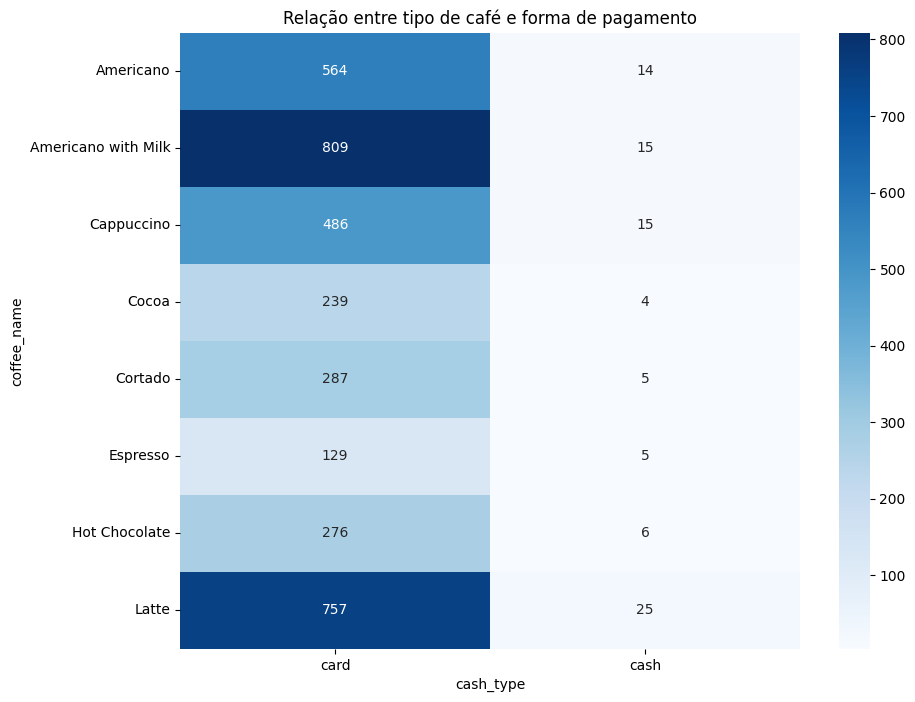

In [49]:
contingency = pd.crosstab(df["coffee_name"], df["cash_type"])

plt.figure(figsize=(10,8))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues")

plt.title("Relação entre tipo de café e forma de pagamento")
plt.show()

## 6. Verificando valores nulos

In [52]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64